In [1]:
import tensorflow as tf

In [2]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

step one: <pre>lets pre proccess the image
I will use agumentation to multiply the number of elements </pre>

In [7]:
import albumentations as alb
import cv2
import os
import uuid
import numpy as np
from sklearn.utils import shuffle
from random import randint

In [61]:
transform = alb.Compose([
    alb.RandomCrop(width=150, height=150),
    alb.HorizontalFlip(p=0.5),
    alb.RandomGamma(p=0.2), 
    alb.RGBShift(p=0.2), 
    alb.VerticalFlip(p=0.5)]
)

<pre>
image_dir = 'train_data'

for image_class in os.listdir(image_dir):
    for image in os.listdir(os.path.join(image_dir, image_class)):
        image_path = os.path.join(image_dir, image_class, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = tf.image.resize(img, (150,150))
        img = np.array(img)
        try:
            for i in range(50):
                agumented = transform(image=img)
                cur_path = os.path.join(image_dir, image_class, f'{str(uuid.uuid1())}.jpg')
                cv2.imwrite(cur_path, agumented['image'])
                print("succes")
        except Exception as e:
            print(str(e))
            </pre>
        

In [14]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'five_birr': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'ten_birr':
            label = 1
        elif labels == 'fifty_birr':
            label = 2
        elif labels == 'hundred_birr':
            label = 3
        elif labels == 'two_hundred':
            label = 4
            
        image_folder = os.path.join(directory , labels)
        for image_file in os.listdir(image_folder): #Extracting the file name of the image from Class Label folder
            path = os.path.join(image_folder , image_file)
            image = cv2.imread(path) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'five_birr', 1:'ten_birr', 2:'fifty_birr', 3:'hundred_birr', 4:'two_hundred'}
    return labels[class_code]

step two: <pre>change the image to numpy array</pre>

In [16]:
Images, Labels = get_images(os.path.join('train_data')) #Extract the training images from the folders.

Images = np.array(Images)/255 #converting the list of images to numpy array and also normalize the the imafe
Labels = np.array(Labels)

In [17]:
import imghdr


In [18]:
img = os.path.join('train_data', 'five_birr', '68fa4378-8d8e-11ed-8914-4cd57764c5d2.jpg')
img = cv2.imread(img)
image_exts = ['jpeg', 'jpg', 'png', 'bmp']


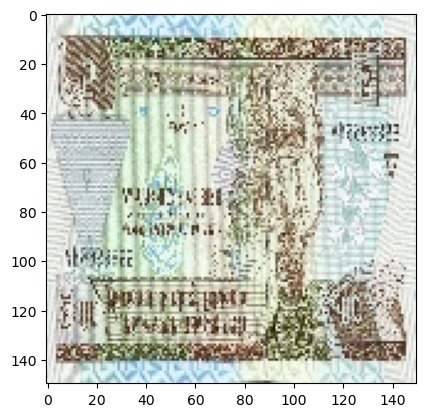

In [20]:
plot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plot.show()

In [ ]:
Images

In [22]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (585, 150, 150, 3)
Shape of Labels: (585,)


In [23]:
from matplotlib import pyplot as plt

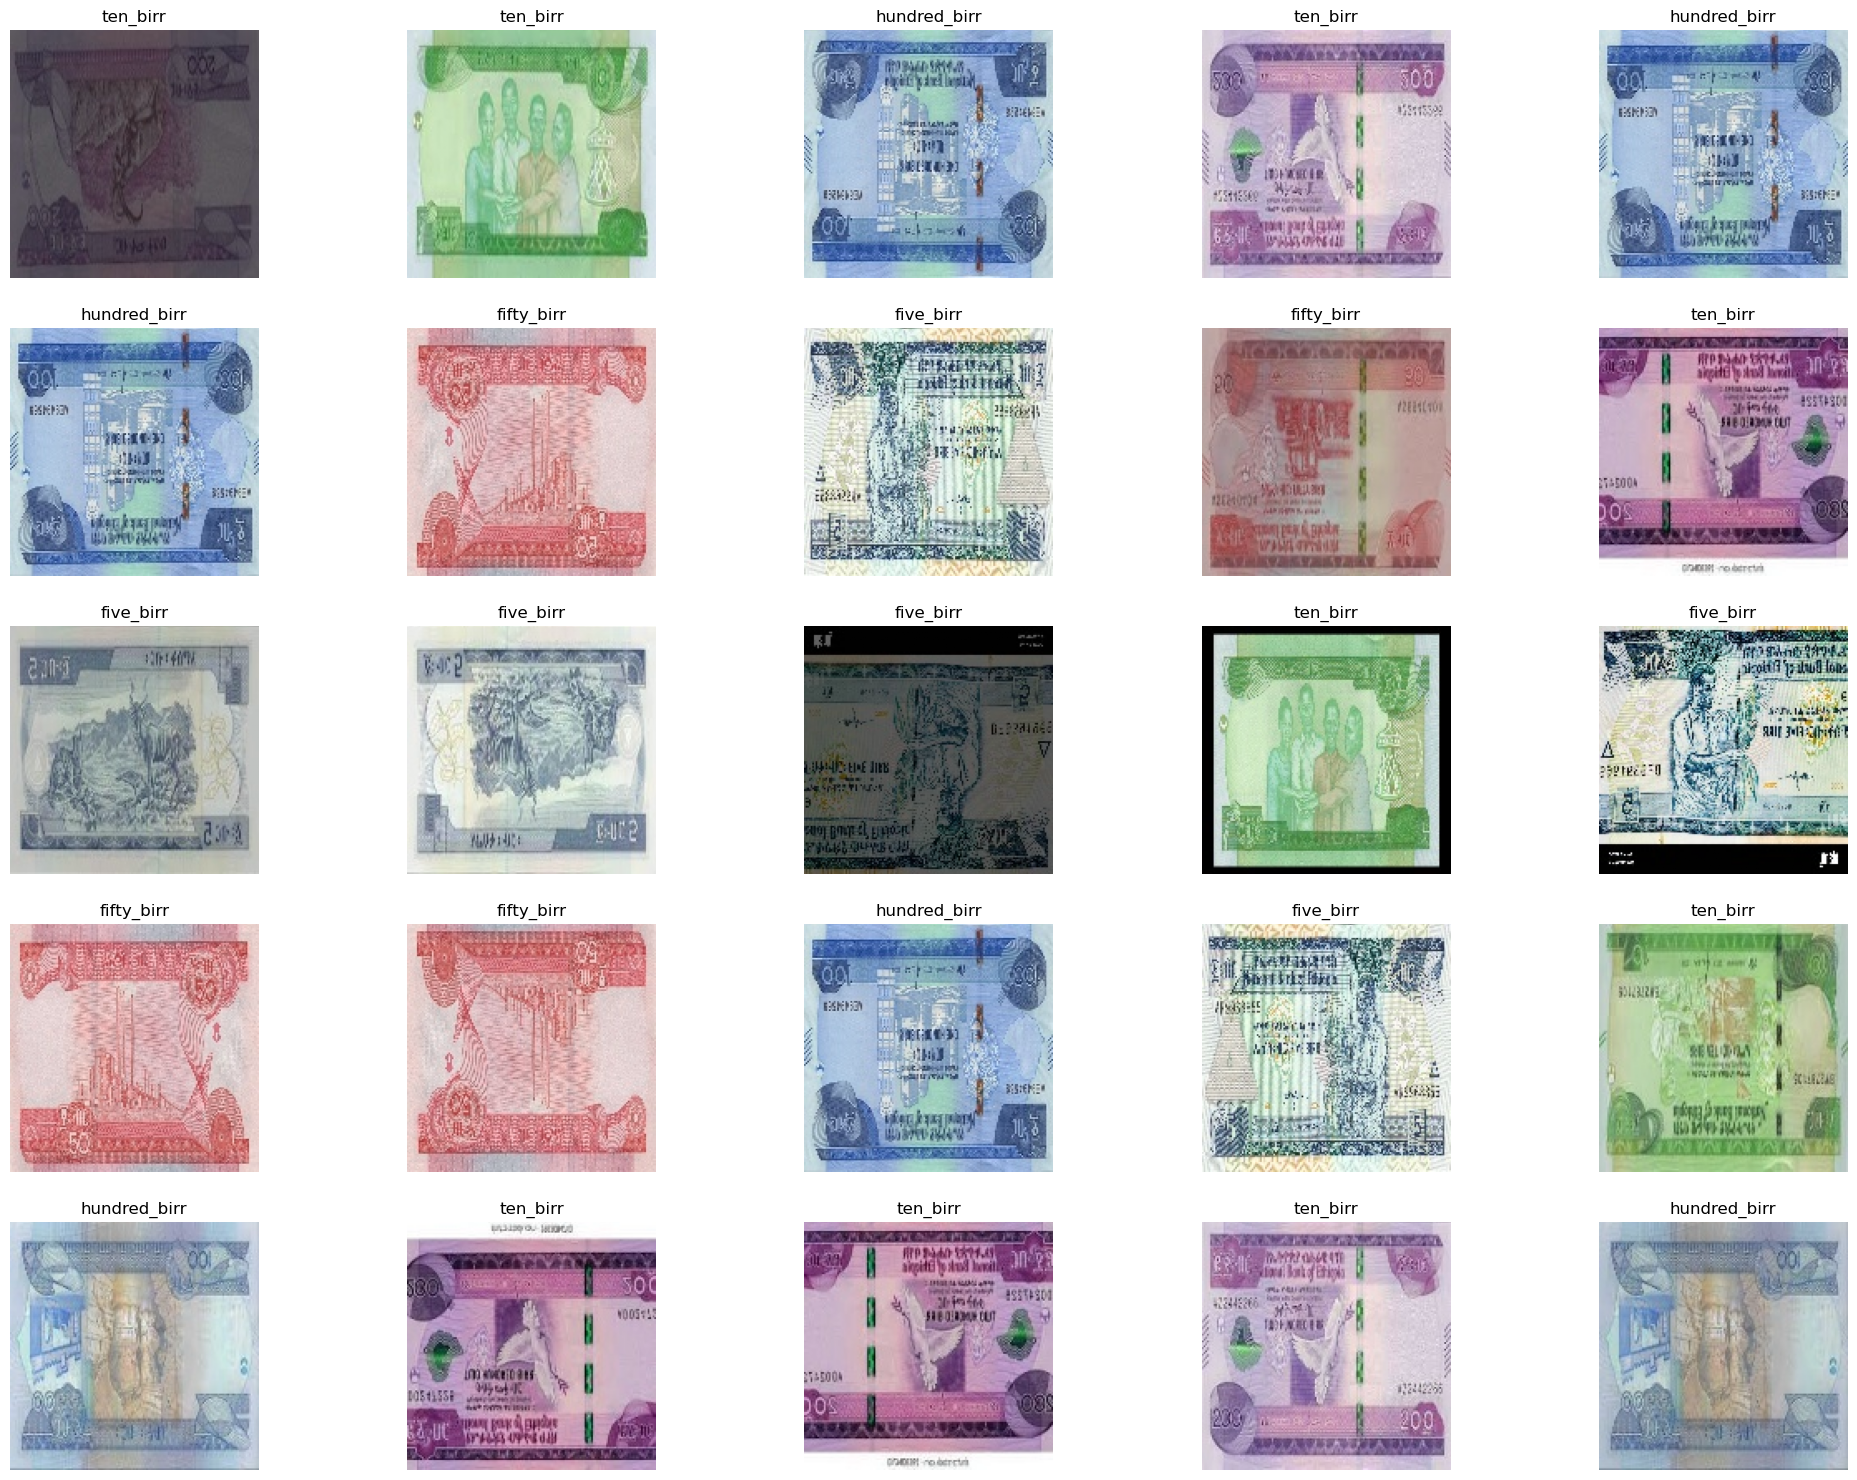

In [24]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [25]:
model = Models.Sequential()

model.add(Layers.Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(125,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(125,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(25,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dense(25,activation='relu'))
model.add(Layers.Dropout(rate=0.2))
model.add(Layers.Dense(5,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 150)     4200      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 125)     168875    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 125)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 125)       140750    
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 100)       112600    
                                                                 
 conv2d_4 (Conv2D)           (None, 67, 67, 50)        45050     
                                                        

In [26]:
trained = model.fit(Images,Labels,epochs=10,validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 159s 10s/step - loss: 1.5543 - accuracy: 0.3098 - val_loss: 1.4911 - val_accuracy: 0.2137
Epoch 2/10
15/15 [==============================] - 94s 6s/step - loss: 1.4535 - accuracy: 0.3483 - val_loss: 1.3540 - val_accuracy: 0.2137
Epoch 3/10
15/15 [==============================] - 103s 7s/step - loss: 1.3191 - accuracy: 0.4038 - val_loss: 1.2211 - val_accuracy: 0.4701
Epoch 4/10
15/15 [==============================] - 95s 6s/step - loss: 1.1586 - accuracy: 0.5278 - val_loss: 0.9935 - val_accuracy: 0.6410
Epoch 5/10
15/15 [==============================] - 93s 6s/step - loss: 1.0236 - accuracy: 0.5791 - val_loss: 0.9083 - val_accuracy: 0.6581
Epoch 6/10
15/15 [==============================] - 97s 6s/step - loss: 0.7999 - accuracy: 0.6645 - val_loss: 0.5062 - val_accuracy: 0.8803
Epoch 7/10
15/15 [==============================] - 97s 6s/step - loss: 0.6975 - accuracy: 0.7179 - val_loss: 0.6085 - val_accuracy: 0.8803
Epoch 8/10
15/15 

In [27]:
trained.history

{'loss': [1.55433189868927,
  1.453465223312378,
  1.3191298246383667,
  1.1585664749145508,
  1.0235857963562012,
  0.7999135255813599,
  0.6974973678588867,
  0.5086095929145813,
  0.6109228730201721,
  0.6446607112884521],
 'accuracy': [0.30982905626296997,
  0.3482905924320221,
  0.4038461446762085,
  0.5277777910232544,
  0.5790598392486572,
  0.6645299196243286,
  0.7179487347602844,
  0.8012820482254028,
  0.8141025900840759,
  0.7414529919624329],
 'val_loss': [1.4910749197006226,
  1.3540104627609253,
  1.2210921049118042,
  0.9935282468795776,
  0.9083171486854553,
  0.5062332153320312,
  0.6085250973701477,
  0.2547505497932434,
  0.5930216908454895,
  0.8828892707824707],
 'val_accuracy': [0.21367521584033966,
  0.21367521584033966,
  0.470085471868515,
  0.6410256624221802,
  0.6581196784973145,
  0.8803418874740601,
  0.8803418874740601,
  0.8803418874740601,
  0.7606837749481201,
  0.6153846383094788]}

In [28]:
import tensorflow as tf

In [29]:
history = trained.history

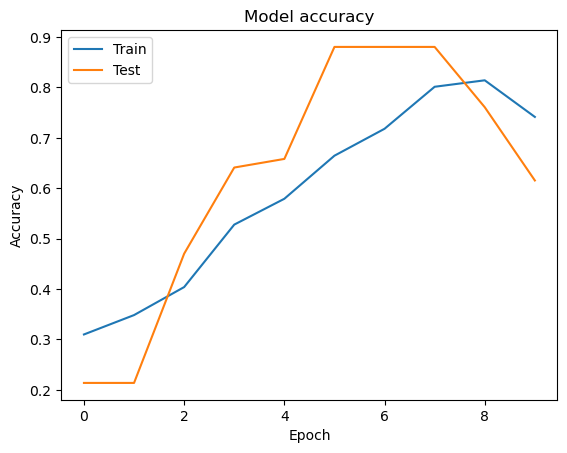

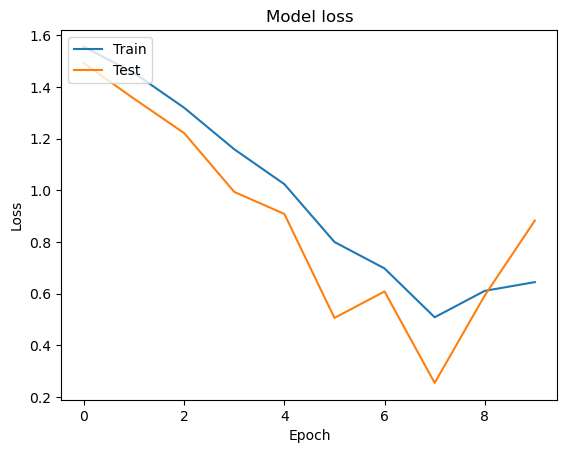

In [30]:
plot.plot(history['accuracy'])
plot.plot(history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history['loss'])
plot.plot(history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
img = cv2.imread('five.jpg')
resized = cv2.resize(img,(150,150))
pred_prob = model.predict(np.expand_dims(resized/255,0)).reshape(3)
pred_image = np.array([resized])
idx = np.argmax(pred_prob,axis=0)
pred_class = get_classlabel(idx)

print(pred_class)

In [38]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    resized = cv2.resize(frame,(150,150))
    pred_prob = model.predict(np.expand_dims(resized/255,0)).reshape(3)
    pred_image = np.array([resized])
    idx = np.argmax(pred_prob,axis=0)
    pred_class = get_classlabel(idx)
    
    cv2.rectangle(frame, 
                      tuple(np.multiply([0.2, 0.2], [0.7,.7]).astype(int)),
                      tuple(np.multiply([0, 0], [450,450]).astype(int)), 
                            (255,0,0), 2)
    
    if pred_prob[idx] / sum(pred_prob) < .8:
        pred_class = 'Identifing ....... '
    
    cv2.putText(frame, pred_class, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255))
    
    cv2.imshow('Detect', frame)
    time.sleep(2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [31]:
def pridict(image):    
    yhat = model.predict(np.expand_dims(image/255, 0))
    idx = 0
    cur = 0
    tot = 0
    for ci, i in enumerate(yhat[0]):
        if i > cur:
            idx = ci
            cur = i
        tot += i
    return get_classlabel(idx), cur/tot * 100, yhat